# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
files = {
    'ADA': 'ADA-USD_historical_data.csv',
    'BNB': 'BNB-USD_historical_data.csv',
    'BTC': 'BTC-USD_historical_data.csv',
    'ETH': 'ETH-USD_historical_data.csv',
    'SOL': 'SOL-USD_historical_data.csv',
    'XRP': 'XRP-USD_historical_data.csv'
}

In [ ]:
crypto_data = {}

# Load each dataset and store the adjusted close prices
for crypto_name, file in files.items():
    try:
        if crypto_name == 'ADA':
            data = pd.read_csv(file, parse_dates=['Date'], dayfirst=True)
        else:
            data = pd.read_csv(file, parse_dates=['Date'])

        data.set_index('Date', inplace=True)
        crypto_data[crypto_name] = data['Adj Close']

    except Exception as e:
        print(f"Error processing {file}: {e}")

## Step 1: Create subplots for each cryptocurrency with different colors

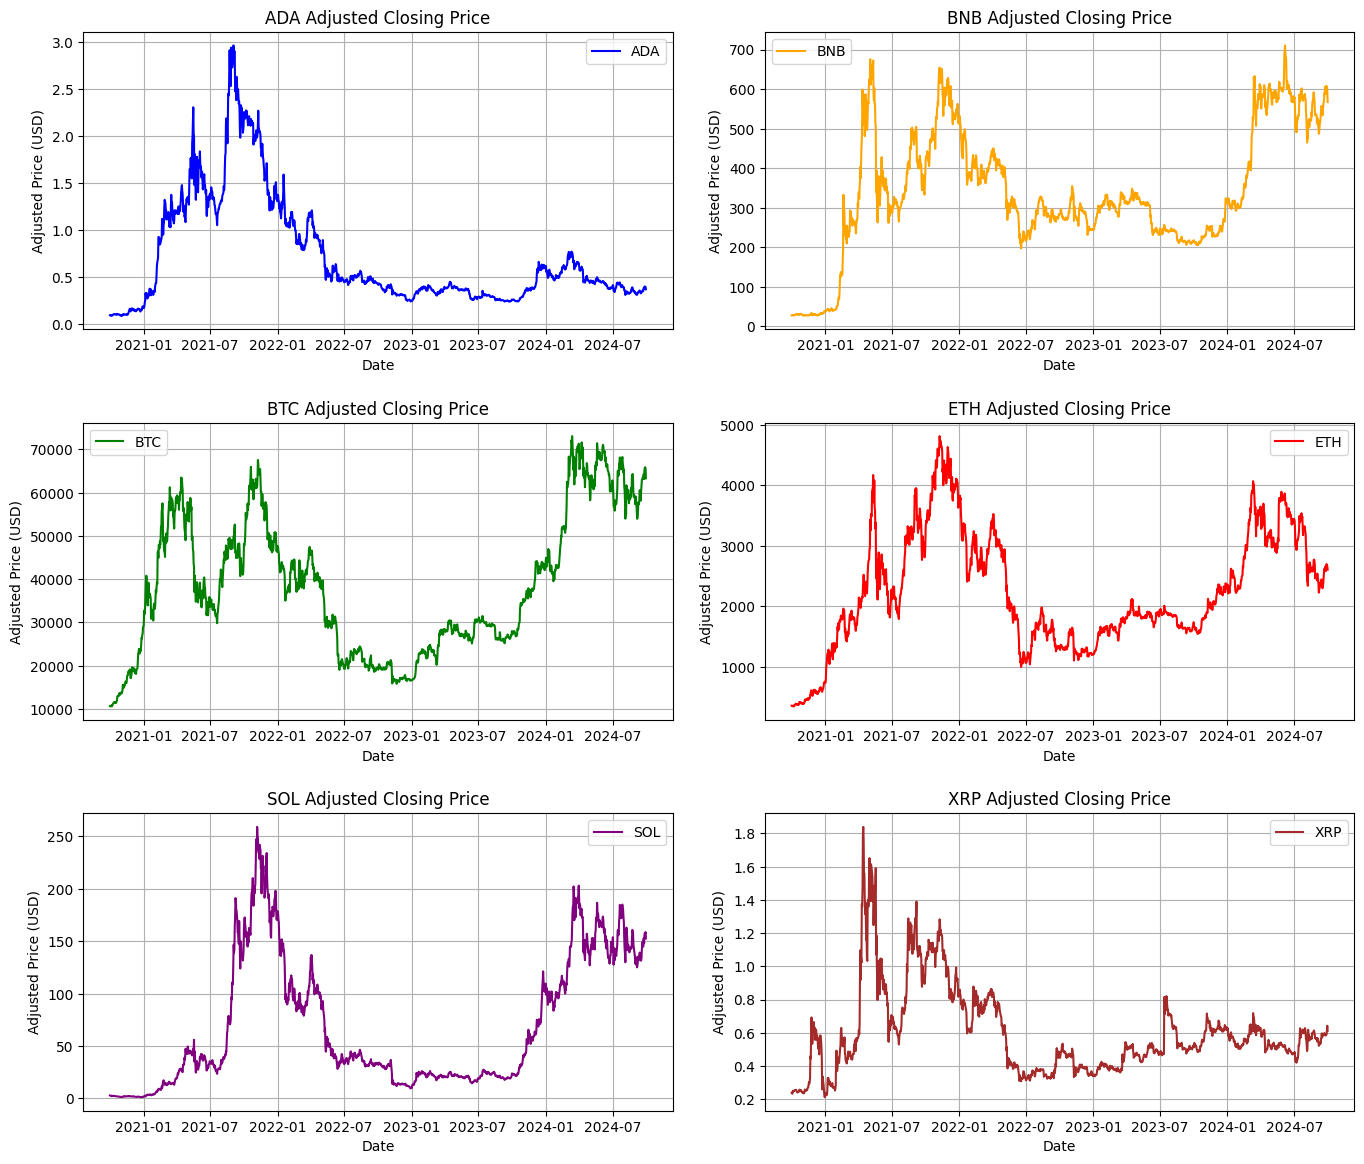

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to easily iterate through

for ax, (crypto_name, adj_close), color in zip(axes, crypto_data.items(), colors):
    ax.plot(adj_close, label=crypto_name, color=color)
    ax.set_title(f'{crypto_name} Adjusted Closing Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Price (USD)')
    ax.grid()
    ax.legend()

# Adjust layout to reduce overlap
plt.tight_layout(pad=2.0)  # Increase padding to reduce overlap
plt.show()

## Step 2: Create a plot with logarithmic scale for all cryptocurrencies

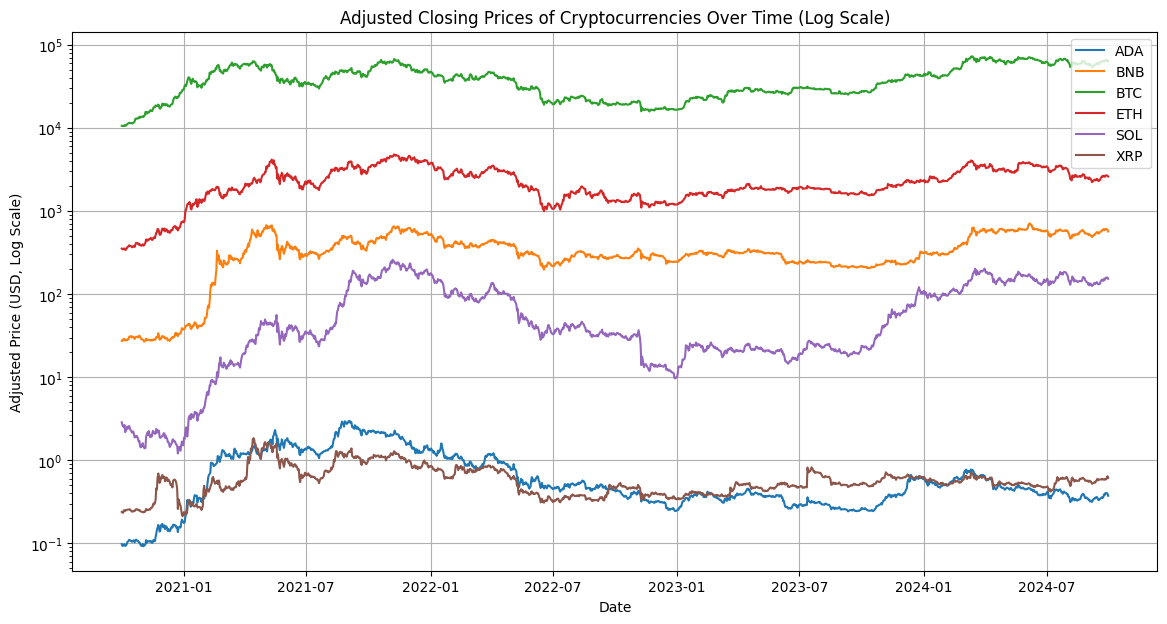

In [ ]:
plt.figure(figsize=(14, 7))

for crypto_name, adj_close in crypto_data.items():
    plt.plot(adj_close, label=crypto_name)

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Customize the plot
plt.title('Adjusted Closing Prices of Cryptocurrencies Over Time (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Adjusted Price (USD, Log Scale)')
plt.legend()
plt.grid()
plt.show()

## Step 3: Plot histograms for adjusted closing prices

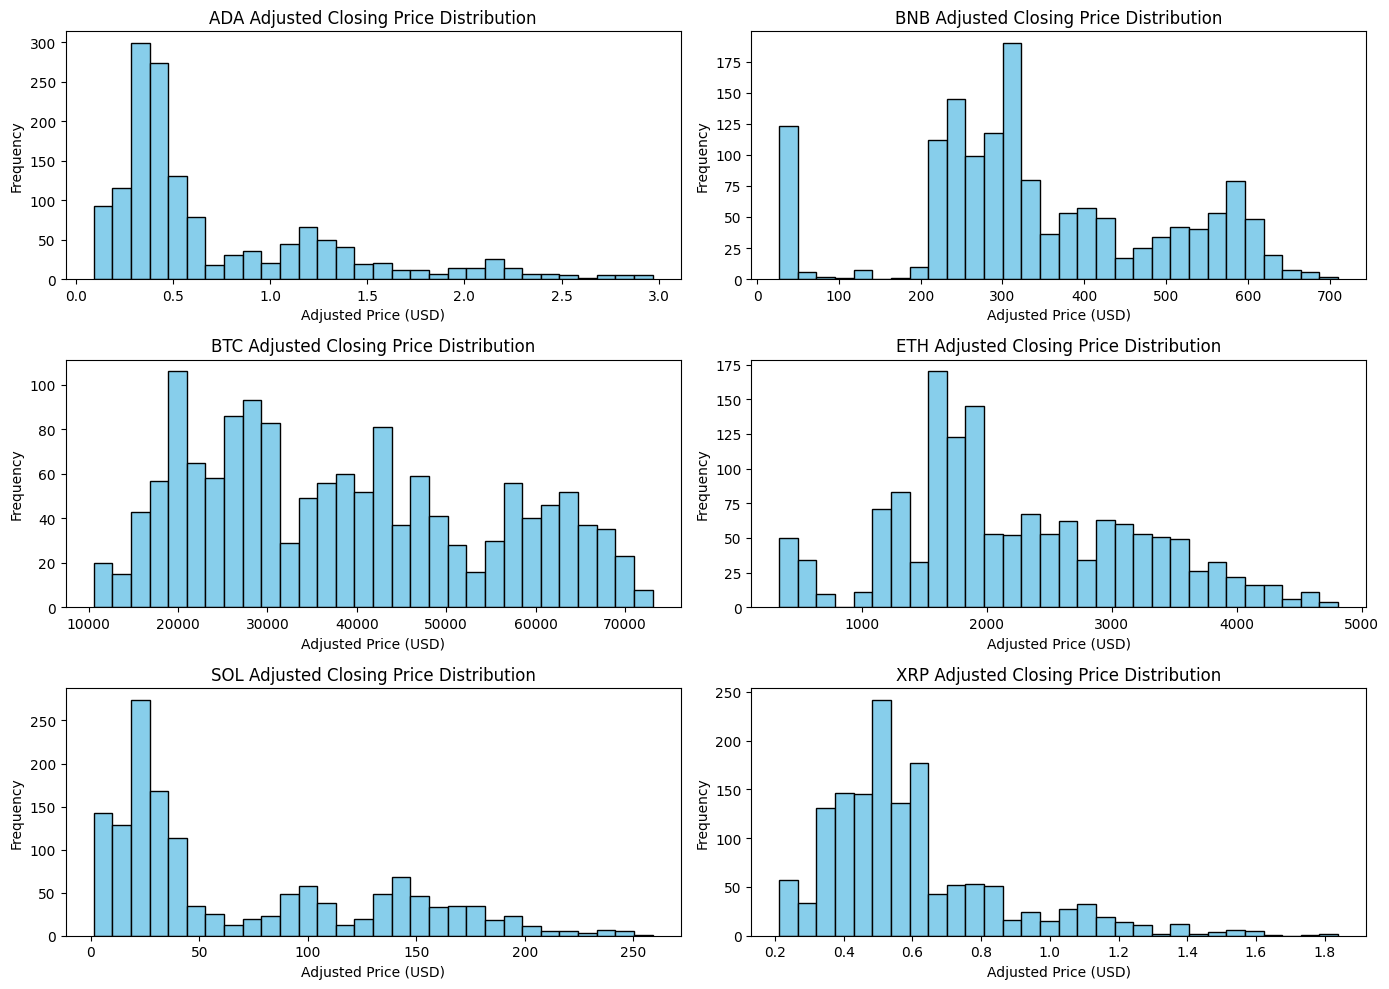

In [ ]:
plt.figure(figsize=(14, 10))

for i, (crypto_name, adj_close) in enumerate(crypto_data.items(), 1):
    plt.subplot(3, 2, i)
    plt.hist(adj_close, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{crypto_name} Adjusted Closing Price Distribution')
    plt.xlabel('Adjusted Price (USD)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Step 4: Plot box plots for adjusted closing prices

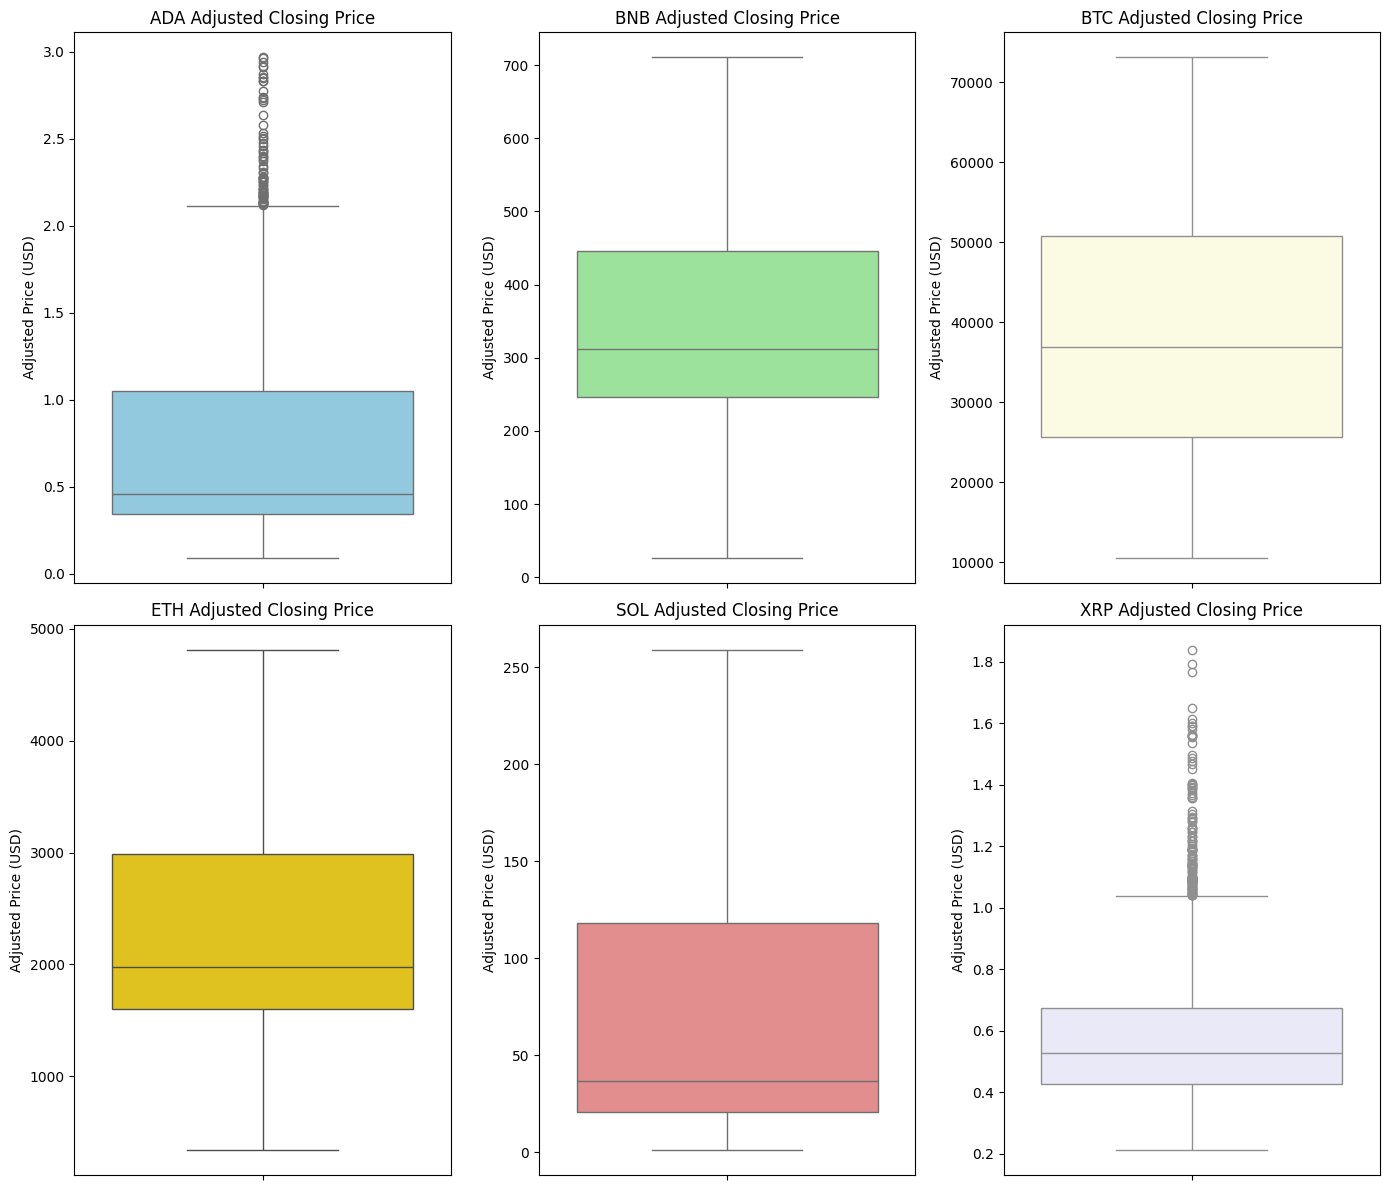

In [ ]:
box_data = pd.DataFrame(crypto_data)
colors = ['skyblue', 'lightgreen', 'lightyellow', 'gold', 'lightcoral', 'lavender']

# Plotting 6 separate box plots in one figure
plt.figure(figsize=(14, 12))

for i, (crypto_name, color) in enumerate(zip(box_data.columns, colors), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=box_data[crypto_name], color=color)
    plt.title(f'{crypto_name} Adjusted Closing Price')
    plt.ylabel('Adjusted Price (USD)')
    # Disable grid
    plt.grid(False)

plt.tight_layout()
plt.show()

## ADF test

In [ ]:
# Function to perform ADF test
def adf_test(series, title=''):
    print(f'ADF Test for {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# of lags', '# of observations']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis: The series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The series is not stationary.")
    print('')

In [ ]:
# Perform ADF test for each cryptocurrency
for crypto_name in box_data.columns:
    adf_test(box_data[crypto_name], crypto_name)

ADF Test for ADA
ADF Statistic: -1.9476509653475922
p-value: 0.3099870414643149
# of lags: 22
# of observations: 1438
Fail to reject the null hypothesis: The series is not stationary.

ADF Test for BNB
ADF Statistic: -2.193075123365843
p-value: 0.208768381160907
# of lags: 6
# of observations: 1454
Fail to reject the null hypothesis: The series is not stationary.

ADF Test for BTC
ADF Statistic: -1.6257087134560415
p-value: 0.4697377308222848
# of lags: 1
# of observations: 1459
Fail to reject the null hypothesis: The series is not stationary.

ADF Test for ETH
ADF Statistic: -2.55424787117026
p-value: 0.10282671166440283
# of lags: 6
# of observations: 1454
Fail to reject the null hypothesis: The series is not stationary.

ADF Test for SOL
ADF Statistic: -1.638399103942517
p-value: 0.46309742952828253
# of lags: 18
# of observations: 1442
Fail to reject the null hypothesis: The series is not stationary.

ADF Test for XRP
ADF Statistic: -3.128742971757568
p-value: 0.024497919124059388


## ACF

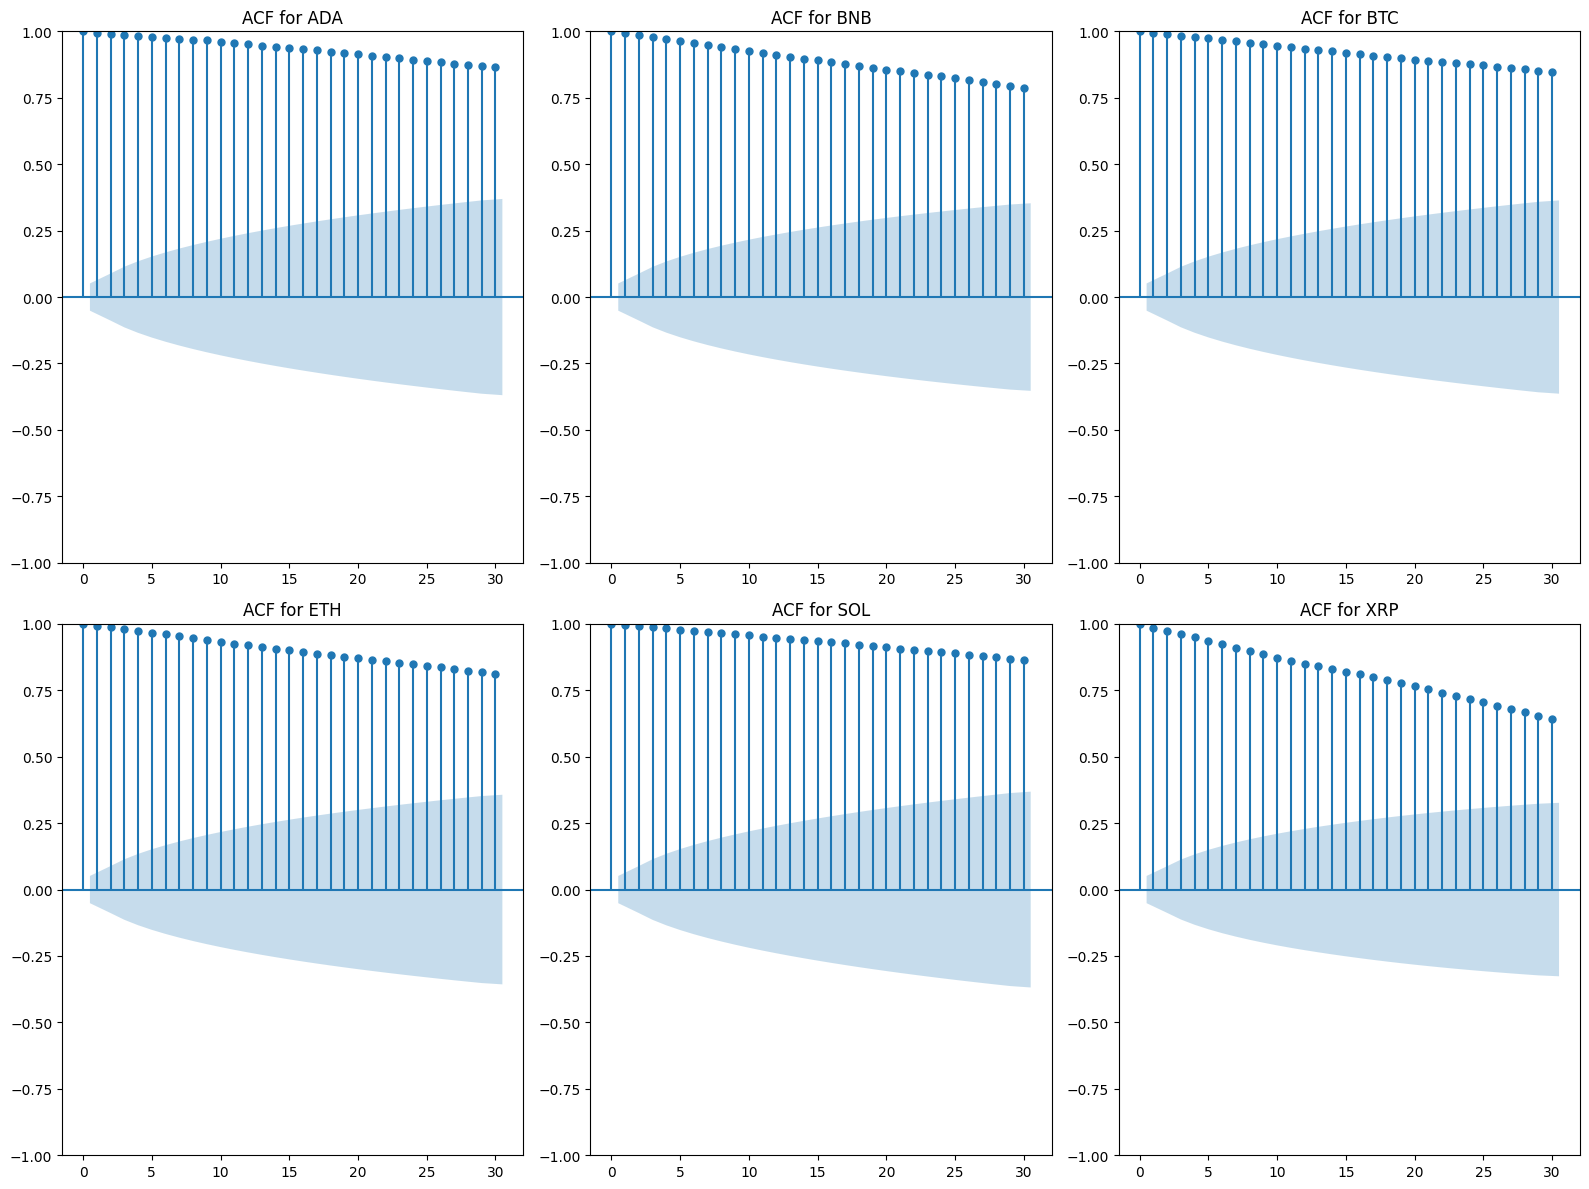

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot ACF for each cryptocurrency in a 2x3 layout
plt.figure(figsize=(16, 12))

for i, crypto_name in enumerate(box_data.columns, 1):
    plt.subplot(2, 3, i)  # 2 rows and 3 columns
    plot_acf(box_data[crypto_name].dropna(), lags=30, ax=plt.gca())
    plt.title(f'ACF for {crypto_name}')

plt.tight_layout()
plt.show()

## PACF

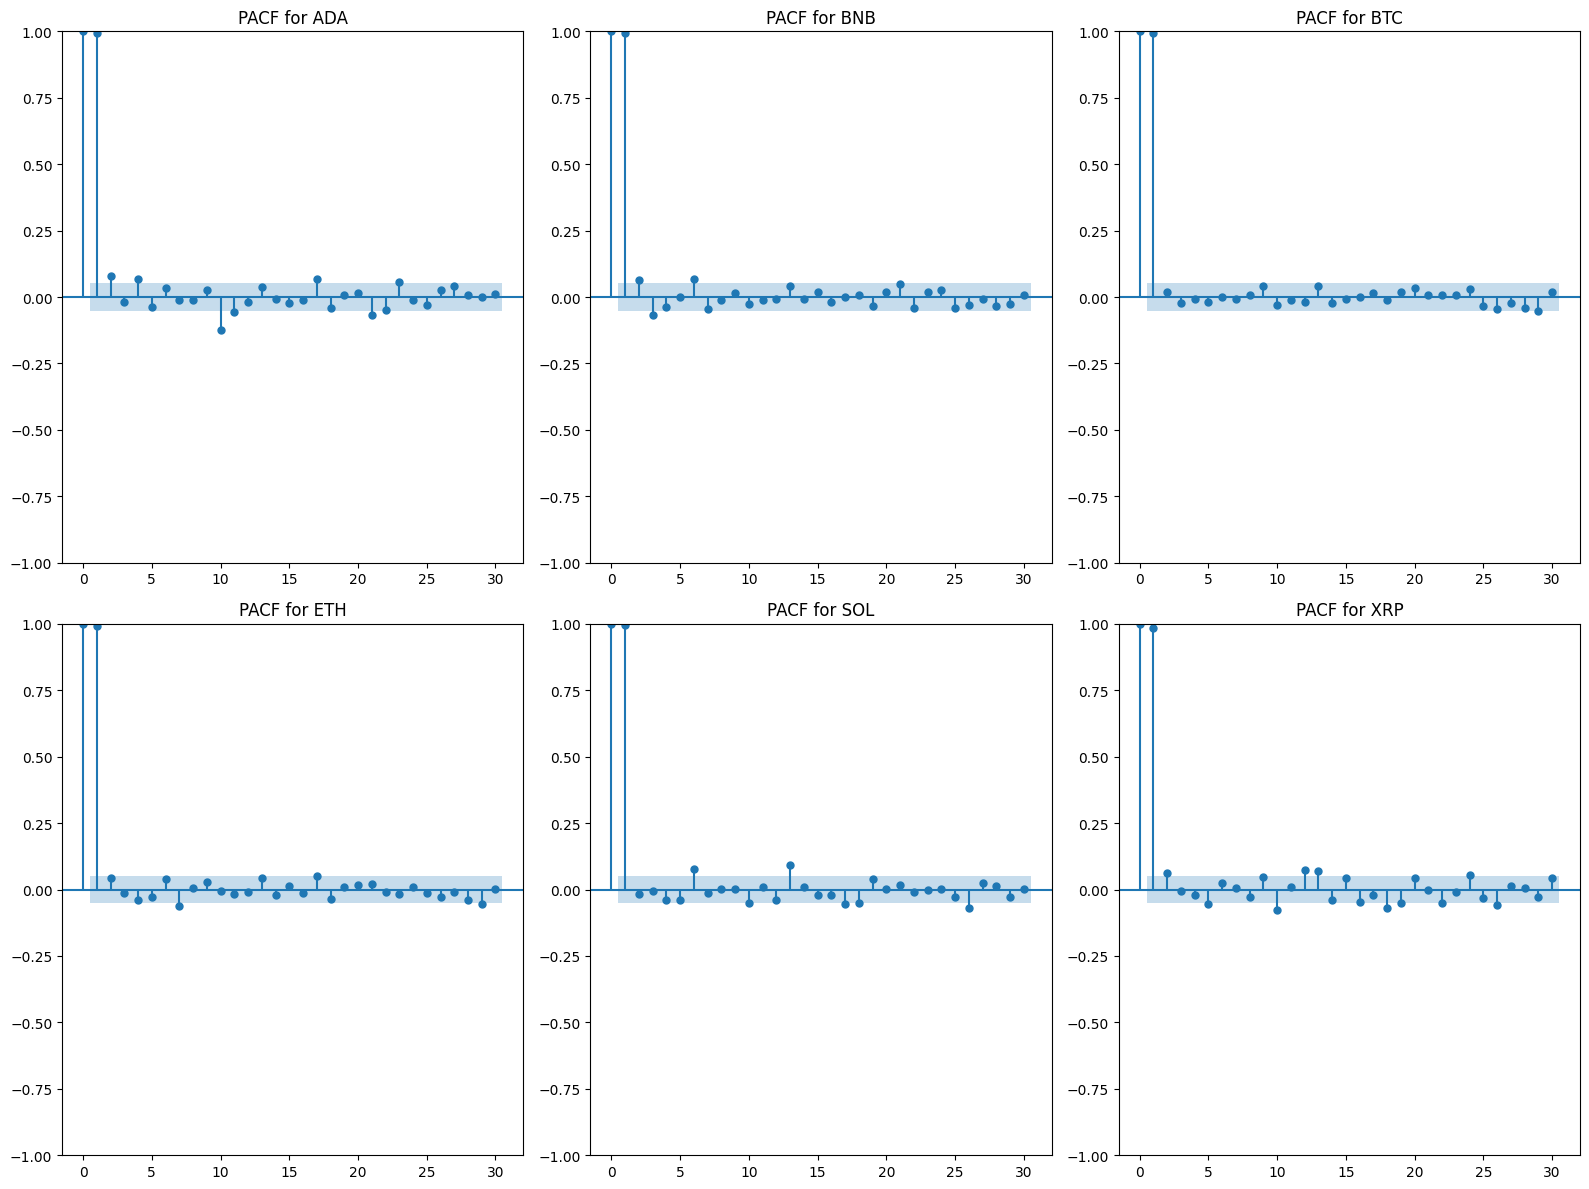

In [ ]:
# Plot PACF for each cryptocurrency in a 2x3 layout
plt.figure(figsize=(16, 12))

for i, crypto_name in enumerate(box_data.columns, 1):
    plt.subplot(2, 3, i)  # 2 rows and 3 columns
    plot_pacf(box_data[crypto_name].dropna(), lags=30, ax=plt.gca())
    plt.title(f'PACF for {crypto_name}')

plt.tight_layout()
plt.show()

## Volatility Analysis

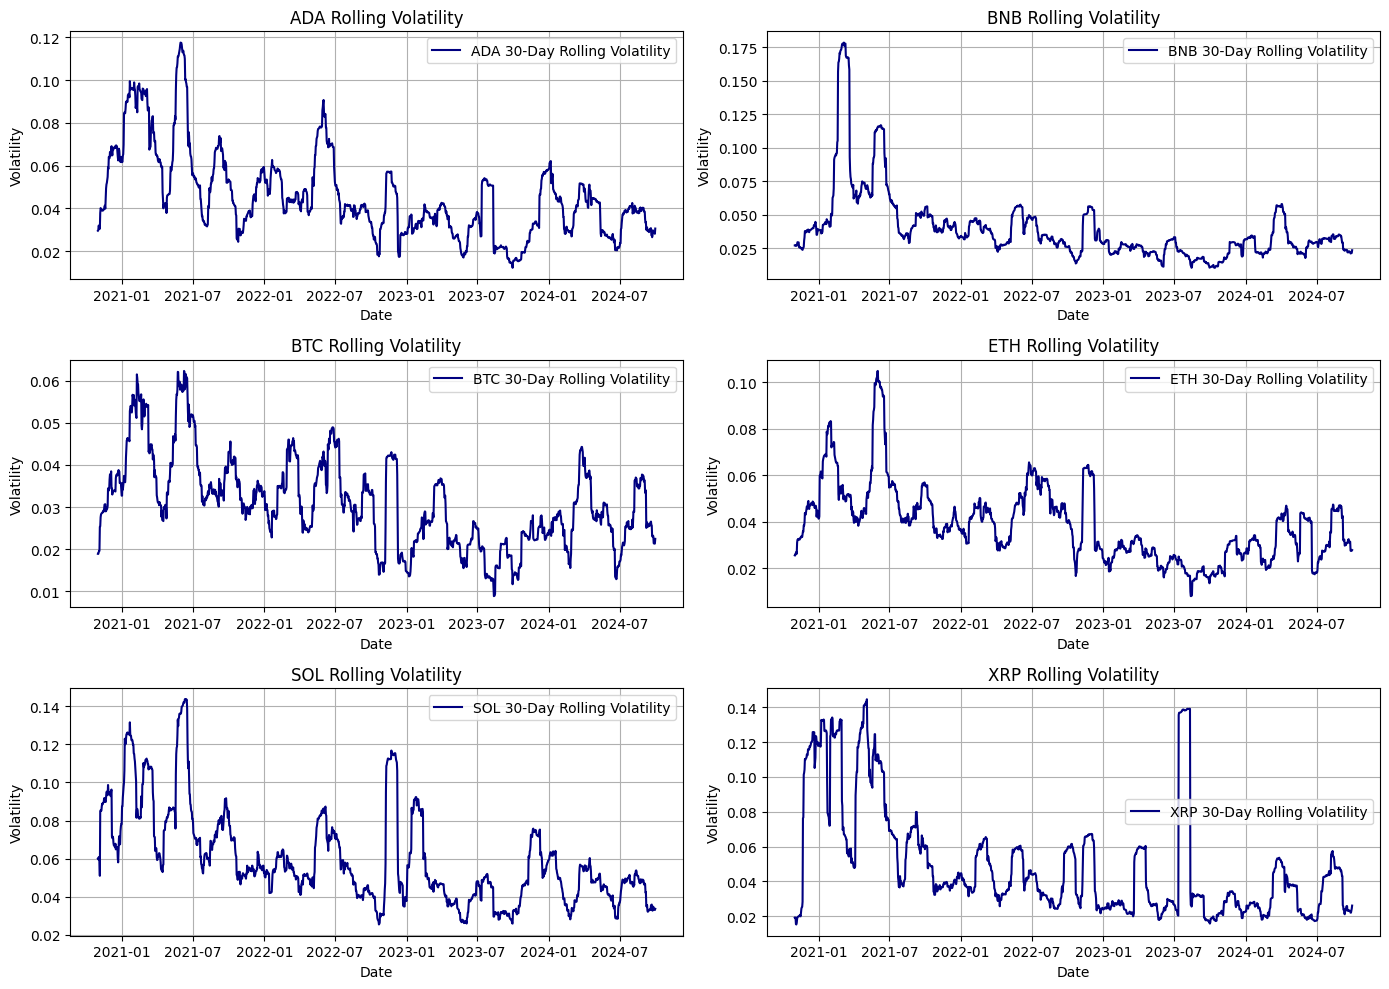

In [ ]:
for crypto_name, file in files.items():
    try:
        # Parsing dates
        if crypto_name == 'ADA':
            data = pd.read_csv(file, parse_dates=['Date'], dayfirst=True)
        else:
            data = pd.read_csv(file, parse_dates=['Date'])

        data.set_index('Date', inplace=True)

        # Store the DataFrame directly to allow for additional columns
        crypto_data[crypto_name] = data[['Adj Close']].copy()  ## small modifications compared to the initial data read in

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Calculate daily returns and rolling volatility for each cryptocurrency
volatility_window = 30  # Adjust the rolling window as needed

for crypto_name, data in crypto_data.items():
    data['daily_return'] = data['Adj Close'].pct_change()  # Daily returns
    data['rolling_volatility'] = data['daily_return'].rolling(window=volatility_window).std()  # Rolling volatility

# Plot rolling volatility for each cryptocurrency
plt.figure(figsize=(14, 10))

for i, (crypto_name, data) in enumerate(crypto_data.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(data['rolling_volatility'], label=f'{crypto_name} 30-Day Rolling Volatility', color='navy')
    plt.title(f'{crypto_name} Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()